## EDA 

This notebook is my initial EDA.  It is a little messy, lots of trial and error.  Please see EDA-Function notebook for cleaned up version.

Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Read in dataset.

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

Checking for nulls

In [5]:
train.isnull().mean().sort_values(ascending=False).head(25)

Pool QC           0.995612
Misc Feature      0.968308
Alley             0.931741
Fence             0.804973
Fireplace Qu      0.487567
Lot Frontage      0.160897
Garage Finish     0.055583
Garage Cond       0.055583
Garage Qual       0.055583
Garage Yr Blt     0.055583
Garage Type       0.055095
Bsmt Exposure     0.028279
BsmtFin Type 2    0.027304
BsmtFin Type 1    0.026816
Bsmt Cond         0.026816
Bsmt Qual         0.026816
Mas Vnr Type      0.010726
Mas Vnr Area      0.010726
Bsmt Half Bath    0.000975
Bsmt Full Bath    0.000975
Garage Cars       0.000488
Garage Area       0.000488
Bsmt Unf SF       0.000488
BsmtFin SF 2      0.000488
Total Bsmt SF     0.000488
dtype: float64

In [6]:
train.isnull().sum().sum()

9822

In [7]:
9822 / (2051 * 81) 

0.059122018166386764

Almost 6% of the data are null values.

In [8]:
train['Misc Feature'].value_counts(dropna=False)

NaN     1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

After checking the data dictionary, I learned that these features are things like Elevator and Tennis court. These would definitley affect price, however, since such a small percent of houses have any special features, I think the data is not worth using.

In [9]:
train['Pool QC'].value_counts(dropna=False)

NaN    2042
Gd        4
TA        2
Fa        2
Ex        1
Name: Pool QC, dtype: int64

According to the data dictionary, the Pool QC column is the quality of the pool and NA = no pool.  I think having a pool is an important feature to a house's price so instead of dropping the column completely, I'm just going to replace the null values.

In [10]:
train['Pool Area'].dtype

dtype('int64')

In [11]:
train['Pool Area'].value_counts()


0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

Pool Area with 0 has the same value count as the NA values for Pool QU so I probably don't need both.  Might be a good idea to combine/compare the data.

In [12]:
train[(train['Pool Area'] !=0 ) & (train['Pool QC'] != 'NaN')].sort_values('Pool Area')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
952,2231,909475230,20,RL,70.0,18044,Pave,NaN,IR1,HLS,...,0,228,Ex,NaN,NaN,0,8,2007,WD,315000
1635,1941,535353050,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,...,0,368,TA,GdPrv,NaN,0,2,2007,WD,153000
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
52,2351,527356020,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,250000
1875,2279,923202220,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,...,0,561,TA,GdPrv,NaN,0,6,2007,WD,130000
657,1567,914475020,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,171000
1130,2358,527377030,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,...,0,648,Fa,GdPrv,NaN,0,1,2006,WD,181000
1249,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,274970
761,2499,532476050,80,RL,100.0,14330,Pave,NaN,IR1,Low,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,260000


In [13]:
train['Pool QC'] = train['Pool QC'].fillna(value="None")
train['Pool QC'].head()

0    None
1    None
2    None
3    None
4    None
Name: Pool QC, dtype: object

In [14]:
train['Pool QC'].unique()

array(['None', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [15]:
train['Pool QC'] = train['Pool QC'].map({'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [16]:
train['Alley'] = train['Alley'].fillna(value="None")
train['Alley'].head()

0    None
1    None
2    None
3    None
4    None
Name: Alley, dtype: object

In [17]:
train['Fence'] = train['Fence'].fillna(value="None")
train['Fence'].head()

0    None
1    None
2    None
3    None
4    None
Name: Fence, dtype: object

Alley and Fence both had mostly null values but I didn't want delete any data completely.  I found in the data dictionary that the nulls equated to no alley or no fence so I used .fillna() to replace the NA cells.

In [18]:
train.isnull().sum().sort_values(ascending=False).head(15)

Misc Feature      1986
Fireplace Qu      1000
Lot Frontage       330
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
dtype: int64

In [19]:
train["Fireplace Qu"].value_counts(dropna=False)

NaN    1000
Gd      523
TA      407
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

Checking columns types for any that seem incorrect.

In [20]:
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [21]:
train['Fireplace Qu'] = train['Fireplace Qu'].fillna(value='None')

In [22]:
train.isnull().sum().sort_values(ascending=False).head(15)

Misc Feature      1986
Lot Frontage       330
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Qual        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
dtype: int64

Before I continue sorting through the null values, I will rename the columns.

In [23]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,0,None,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,0,None,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,0,None,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,0,None,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,0,None,NaN,0,3,2010,WD,138500


In [24]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [25]:
new_columns_dict = {
    'PID': 'parcel_id',
    'MS SubClass' : 'ms_subclass',
    'MS Zoning': 'zoning', 
    'Lot Frontage': 'lot_frontage',
    'Lot Area': 'lot_sq_ft',
    'Street': 'paved_street', 
    'Alley': 'alley', 
    'Lot Shape': 'lot_shape', 
    'Land Contour': 'flatness', 
    'Utilities': 'utilities',       
    'Lot Config': 'lot_config', 
    'Land Slope': 'land_slope', 
    'Neighborhood': 'neighborhood', 
    'Condition 1': 'proximity_1',
    'Condition 2': 'proximity_2', 
    'Bldg Type': 'building_type', 
    'House Style': 'style', 
    'Overall Qual': 'quality_rating',
    'Overall Cond': 'condition_rating', 
    'Year Built': 'year_built', 
    'Year Remod/Add': 'year_renovation', 
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_material', 
    'Exterior 1st': 'exterior_1', 
    'Exterior 2nd': 'exterior_2', 
    'Mas Vnr Type': 'masonry_type',
    'Mas Vnr Area': 'masonry_area', 
    'Exter Qual': 'exterior_quality', 
    'Exter Cond': 'exterior_quality', 
    'Foundation': 'foundation_type', 
    'Bsmt Qual': 'basement_height',
    'Bsmt Cond': 'basement_condition', 
    'Bsmt Exposure': 'basement_exposure', 
    'BsmtFin Type 1': 'basement_finished_condition', 
    'BsmtFin SF 1': 'basement_fin_sqft',
    'BsmtFin Type 2': 'basement_2_condition', 
    'BsmtFin SF 2': 'basement_2_sqft', 
    'Bsmt Unf SF': 'unfinished_basement_sqft', 
    'Total Bsmt SF': 'total_basement_sqft',
    'Heating': 'heating_type', 
    'Heating QC': 'heating_quality', 
    'Central Air': 'has_central_air', 
    'Electrical': 'electrical', 
    '1st Flr SF': 'first_fl_sqft',
    '2nd Flr SF': 'second_fl_sqft', 
    'Low Qual Fin SF': 'low_quality_sqft', 
    'Gr Liv Area': 'living_area_sqft', 
    'Bsmt Full Bath': 'basement_full_bath',
    'Bsmt Half Bath': 'basement_half_bath', 
    'Full Bath': 'full_bath', 
    'Half Bath': 'half_bath', 
    'Bedroom AbvGr': 'bedrooms',
    'Kitchen AbvGr': 'kitchens', 
    'Kitchen Qual': 'kitchen_quality', 
    'TotRms AbvGrd': 'total_rooms(non-bath_or_basement)', 
    'Functional': 'functionality',
    'Fireplaces': 'fireplaces', 
    'Fireplace Qu': 'fireplace_quality', 
    'Garage Type': 'garage_type', 
    'Garage Yr Blt': 'garage_year',
    'Garage Finish': 'garage_finish', 
    'Garage Cars': 'garage_size', 
    'Garage Area': 'garage_sqft', 
    'Garage Qual': 'garage_quality',
    'Garage Cond': 'garage_condition', 
    'Paved Drive': 'has_paved_driveway', 
    'Wood Deck SF': 'deck_sqft', 
    'Open Porch SF': 'open_porch_sqft',
    'Enclosed Porch': 'enclosed_porch_sqft', 
    '3Ssn Porch': 'seasonal_porch_sqft', 
    'Screen Porch': 'screen_porch_sqft', 
    'Pool Area': 'pool_size', 
    'Pool QC': 'pool_quality',
    'Fence': 'fence_quality', 
    'Misc Feature': 'misc_feature',
    'Misc Value': 'misc_value',
    'Mo Sold': 'month_sold', 
    'Yr Sold': 'year_sold', 
    'Sale Type': 'sale_type', 
    'SalePrice': 'price'
    
}

In [26]:
train.rename(columns=new_columns_dict, inplace=True)

In [27]:
train.describe()

,Id,parcel_id,ms_subclass,lot_frontage,lot_sq_ft,quality_rating,condition_rating,year_built,year_renovation,masonry_area,...,open_porch_sqft,enclosed_porch_sqft,seasonal_porch_sqft,screen_porch_sqft,pool_size,pool_quality,Misc Val,month_sold,year_sold,price
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,47.556802,22.571916,2.591419,16.511458,2.397855,0.010726,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,66.747241,59.845110,25.229615,57.374204,37.782570,0.173576,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,547.000000,432.000000,508.000000,490.000000,800.000000,4.000000,17000.000000,12.000000,2010.000000,611657.000000


In [28]:
train['garage_size'].value_counts(dropna=False)

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
NaN       1
5.0       1
Name: garage_size, dtype: int64

In [29]:
train['garage_size'] = train['garage_size'].fillna(value=0.0)

Garage size seems like a column that may be useful so I filled in the one null value with a 0.0.

In [30]:
train['garage_year'] = train['garage_year'].fillna(value=0)

In [31]:
train['garage_year'] = train['garage_year'].astype(int)

Filled in nulls for Garage Year Built and fixed the type to int from float.

In [32]:
train['baths'] = train['basement_full_bath'] + train['full_bath'] +(train['basement_half_bath']/2) + (train['half_bath']/2)

Created new column for total full and half bath instead of splitting up above ground & basement.

In [33]:
train['baths'].head(10)
# It worked!

0    2.5
1    3.5
2    2.0
3    2.5
4    2.0
5    2.5
6    3.0
7    2.0
8    1.0
9    2.5
Name: baths, dtype: float64

In [34]:
train[['basement_finished_condition', 'basement_2_condition', 'basement_fin_sqft', 
       'basement_2_sqft', 'total_basement_sqft']].head()

,basement_finished_condition,basement_2_condition,basement_fin_sqft,basement_2_sqft,total_basement_sqft
0,GLQ,Unf,533.0,0.0,725.0
1,GLQ,Unf,637.0,0.0,913.0
2,GLQ,Unf,731.0,0.0,1057.0
3,Unf,Unf,0.0,0.0,384.0
4,Unf,Unf,0.0,0.0,676.0


After learning the definition of a finished basement from HomeWorx, I feel that having one is pretty valuable as it adds additional living space to a house. Therefore, below I will focus on cleaning the basement data to make it more useful.

https://www.homeworxiowa.com/2018/09/26/basement-finishing-faqs/

In [35]:
train['basement_finished_condition'].value_counts(dropna=False)

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: basement_finished_condition, dtype: int64

In [36]:
train['basement_finished_condition'] = train['basement_finished_condition'].fillna(value='None')

In [37]:
train['basement_finished_condition'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'None', 'BLQ', 'LwQ'], dtype=object)

In [38]:
train['basement'] = train['basement_finished_condition'].map({'GLQ': 'finished', 
                                          'Unf': 'unfinished', 
                                          'ALQ': 'finished', 
                                          'Rec': 'finished', 
                                          'None': 'none', 
                                          'BLQ': 'finished', 
                                          'LwQ': 'finished'})

In [39]:
train = pd.get_dummies(train, columns = ["basement"])

In [40]:
train.head()

,Id,parcel_id,ms_subclass,zoning,lot_frontage,lot_sq_ft,paved_street,alley,lot_shape,flatness,...,misc_feature,Misc Val,month_sold,year_sold,sale_type,price,baths,basement_finished,basement_none,basement_unfinished
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,NaN,0,3,2010,WD,130500,2.5,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,NaN,0,4,2009,WD,220000,3.5,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,NaN,0,1,2010,WD,109000,2.0,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,NaN,0,4,2010,WD,174000,2.5,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,NaN,0,3,2010,WD,138500,2.0,0,0,1


In [41]:
train.drop(['basement_none'], axis=1, inplace=True)

I simplified basement conditions into Finished, Unfinished or No Basement and made dummy columns and dropped the 'basement none' column. A 0 in both Finished and Unfinished = No Basement.

In [42]:
train['finished_basement_sqft'] = train['basement_fin_sqft'] + train['basement_2_sqft']

In [43]:
train.head()

,Id,parcel_id,ms_subclass,zoning,lot_frontage,lot_sq_ft,paved_street,alley,lot_shape,flatness,...,misc_feature,Misc Val,month_sold,year_sold,sale_type,price,baths,basement_finished,basement_unfinished,finished_basement_sqft
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,NaN,0,3,2010,WD,130500,2.5,1,0,533.0
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,NaN,0,4,2009,WD,220000,3.5,1,0,637.0
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,NaN,0,1,2010,WD,109000,2.0,1,0,731.0
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,NaN,0,4,2010,WD,174000,2.5,0,1,0.0
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,NaN,0,3,2010,WD,138500,2.0,0,1,0.0


I combined the two finished basement sqaure feet columns into one new column. 

In [44]:
train['paved_street'].value_counts(dropna=False)

Pave    2044
Grvl       7
Name: paved_street, dtype: int64

In [45]:
train['paved_street'] = train['paved_street'].map({'Pave': 1, 'Grvl': 0})

Since the 'Street' column was only 2 unique observations, I used feature engineering to binarize it to either a 1 for paved or a 0 for gravel.  I will do the same for 'Paved Drive' and 'Central Air'.

In [46]:
train['has_paved_driveway'].value_counts(dropna=False)
# Y = Paved 
# P = Partial Pavement
# N = Dirt/Gravel

Y    1861
N     151
P      39
Name: has_paved_driveway, dtype: int64

In [47]:
train['has_paved_driveway'] = train['has_paved_driveway'].map({'Y': 1, 'P': 1, 'N': 0})

In [48]:
train['has_paved_driveway'].value_counts()

1    1900
0     151
Name: has_paved_driveway, dtype: int64

In [49]:
train['has_central_air'].unique()

array(['Y', 'N'], dtype=object)

In [50]:
train['has_central_air'] = train['has_central_air'].map({'Y': 1, 'N': 0})

In [51]:
train['year_renovation'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_renovation, dtype: float64

In [52]:
train['newly_renovated'] = train['year_renovation'].map(lambda reno: 1 if reno >= 2010 else 0)

Used feature engineering to create a 'newly_renovated' column which has a 1 if the house has been renovated since 2000 and a 0 if it has older or no renovations.

In [53]:
train.isnull().sum().sort_values(ascending=False).head()

misc_feature        1986
lot_frontage         330
garage_quality       114
garage_condition     114
garage_finish        114
dtype: int64

In [54]:
train['baths'].value_counts(dropna=False)

2.0    636
2.5    391
1.0    314
3.0    278
3.5    199
1.5    193
4.0     22
4.5     11
7.0      2
6.0      2
NaN      2
5.0      1
Name: baths, dtype: int64

In [55]:
train[['lot_frontage', 'garage_quality']].fillna(value='None').head()

,lot_frontage,garage_quality
0,None,TA
1,43,TA
2,68,TA
3,73,TA
4,82,TA


In [56]:
train.isnull().sum().sort_values(ascending=False).head(15)

misc_feature            1986
lot_frontage             330
garage_quality           114
garage_condition         114
garage_finish            114
garage_type              113
basement_exposure         58
basement_2_condition      56
basement_height           55
basement_condition        55
masonry_area              22
masonry_type              22
baths                      2
basement_full_bath         2
basement_half_bath         2
dtype: int64

In [57]:
train.loc[train['garage_sqft'].isnull(), ['garage_size']]

,garage_size
1712,0.0


In [58]:
train['garage_sqft'] = train['garage_sqft'].fillna(value=0)

In [59]:
train['garage_size'] = train.garage_size.astype(int)

In [60]:
train['garage_type'] = train['garage_type'].fillna(value='no garage')

In [61]:
train['lot_frontage'] = train['lot_frontage'].fillna(value=0.0)

Above I replaced or dropped the Nulls in the potentially useful columns.

In [62]:
train['functionality'].unique()

array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
      dtype=object)

In [63]:
train['functionality'] = train['functionality'].map({
    'Maj2': 'deducted',
    'Mod': 'deducted',                        
    'Min2':'deducted', 
    'Maj1': 'deducted',
    'Min1': 'deducted',
    'Sev': 'severely_damaged',
    'Sal': 'salvage_only',
    'Typ': 'typical'
    
})

In [64]:
train = pd.get_dummies(train, columns=['functionality'], drop_first=True)

In [65]:
train.building_type.unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [66]:
train['building_type'] = train['building_type'].map({
    '2fmCon': "two_family_conversion",
    'Twnhs' : 'townhouse_inside_unit',
    'TwnhsE': 'townhouse_end_unit',
    '1Fam': 'single_family',
    'Duplex': 'duplex'
})

In [67]:
train = pd.get_dummies(train, columns=['building_type'], drop_first=True)

Used mapping to changing categorical names for Building Type and Functionality and then used get_dummies to turn each type and function into its own column.

In [68]:
train.to_csv('train_clean.csv')
#saved my clean dataframe

#### Now it's time to correlate

In [69]:
train.corr()[['price']].sort_values('price')

,price
parcel_id,-0.255052
enclosed_porch_sqft,-0.135656
kitchens,-0.125444
basement_unfinished,-0.124720
building_type_townhouse_inside_unit,-0.113895
building_type_two_family_conversion,-0.111423
condition_rating,-0.097019
ms_subclass,-0.087335
functionality_salvage_only,-0.059110
Id,-0.051398


In [70]:
train['quality_rating'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: quality_rating, dtype: int64

In [71]:
good_cols = ['fireplaces', 'has_central_air','bedrooms', 'quality_rating',
                   'kitchens', 'lot_sq_ft', 'living_area_sqft','garage_size',
                   'baths', 'finished_basement_sqft', 'year_built',
                   'has_paved_driveway', 'functionality_typical', 'building_type_single_family', 
                   'building_type_townhouse_end_unit','building_type_townhouse_inside_unit',
                   'building_type_two_family_conversion', 'open_porch_sqft','enclosed_porch_sqft', 
                   'seasonal_porch_sqft', 'screen_porch_sqft', 'price']

In [72]:
train.shape

(2051, 91)

In [73]:
train[good_cols].shape

(2051, 22)

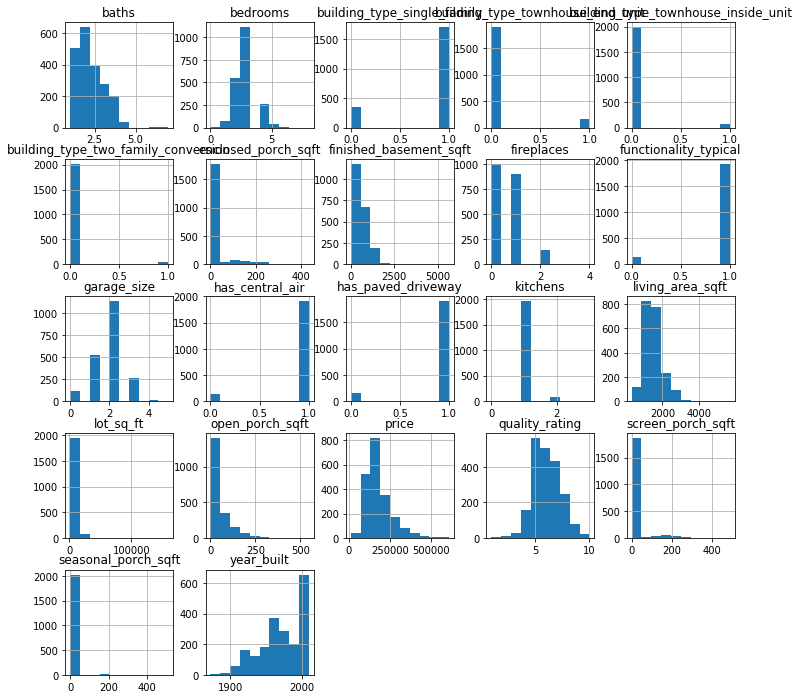

In [74]:
train[good_cols].hist(figsize=(12,12));

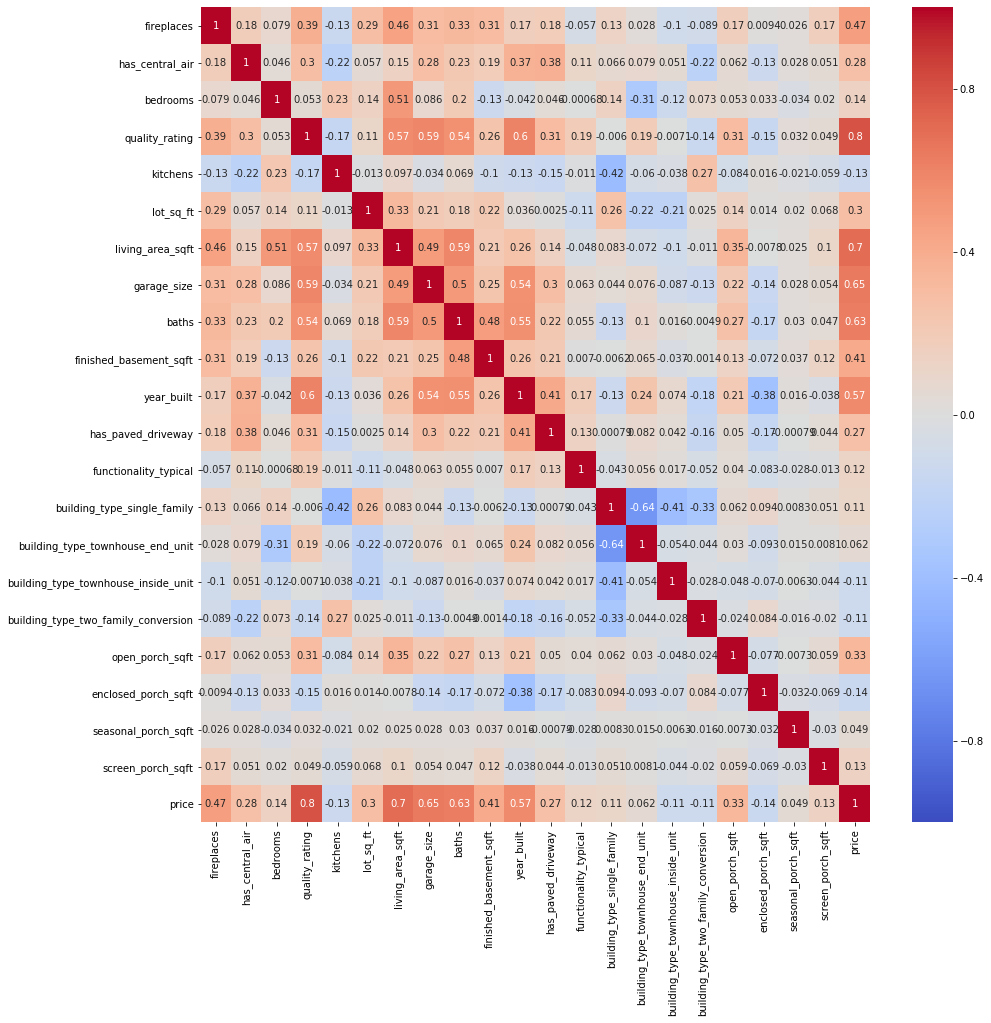

In [75]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[good_cols].corr(),
           annot=True,
           cmap='coolwarm',
           vmin=-1)

In [76]:
train['year * garage'] = train['year_built'] * train['garage_size']

I noticed a high correlation between 'year_built' and 'garage_size' so I made an interaction column for them.

In [77]:
better_cols = ['fireplaces', 'has_central_air','bedrooms', 'quality_rating',
             'living_area_sqft', 'year * garage', 'year_built', 'garage_size', 'baths', 'price']

In [78]:
features = features = [col for col in better_cols if col != 'price']

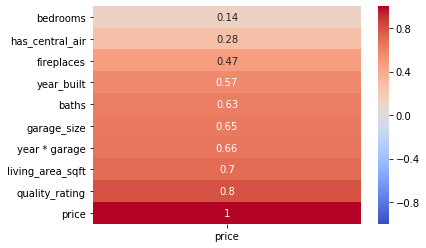

In [79]:
sns.heatmap(train[better_cols].corr()[['price']].sort_values('price'),
           annot=True,
           cmap='coolwarm',
           vmin=-1)

Afer checking the correlation to price 'year * garage' is a little better than both 'year_built' and 'garage_size'  separately but I don't think it's worth using.

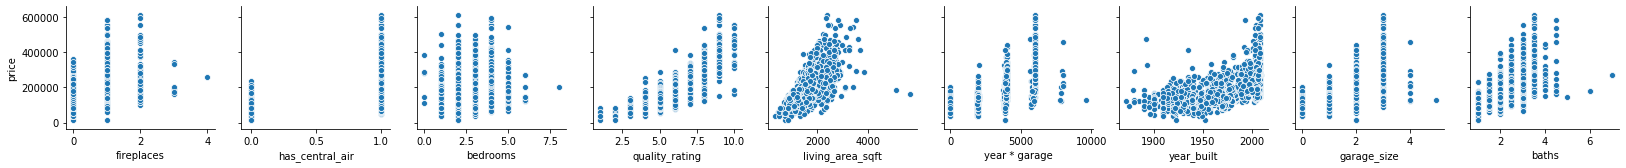

In [80]:
sns.pairplot(train, x_vars= features, y_vars=['price'])

Checking for distributions

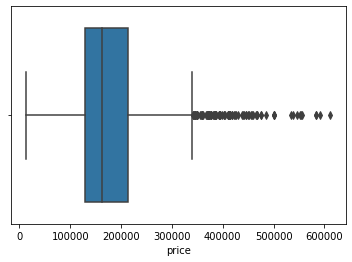

In [81]:
sns.boxplot(train.price)
# Right skewed

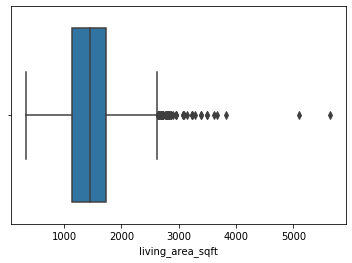

In [82]:
sns.boxplot(train.living_area_sqft)
# Right skewed 

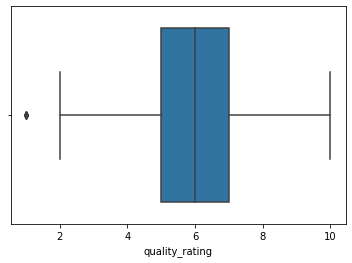

In [83]:
sns.boxplot(train.quality_rating)

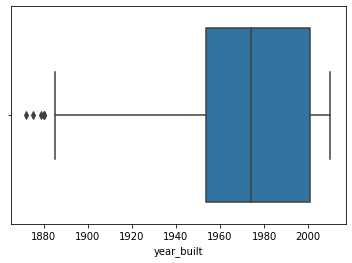

In [84]:
sns.boxplot(train.year_built)

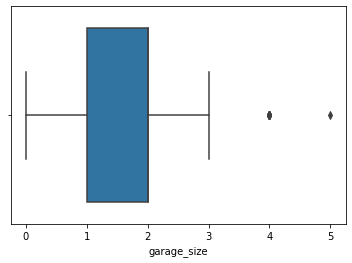

In [85]:
sns.boxplot(train.garage_size)

In [86]:
train[['first_fl_sqft', 'second_fl_sqft', 'living_area_sqft']].head()

,first_fl_sqft,second_fl_sqft,living_area_sqft
0,725,754,1479
1,913,1209,2122
2,1057,0,1057
3,744,700,1444
4,831,614,1445


In [87]:
# Checking if 'first_fl_sqft' + 'second_fl_sqft' = 'living_area_sqft'
#They do so I will add them to my function to drop them

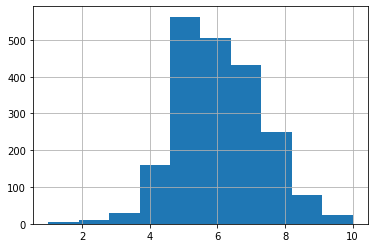

In [88]:
train.quality_rating.hist()